In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [68]:
df = pd.read_csv("./jw-combined-graph/live-birth.csv", thousands=",") #header=None, 
births_df = df.T
births_df.columns = births_df.iloc[0]
births_df = births_df[1:]
births_df["Quarter"] = births_df.index
births_df = births_df.iloc[::-1]
# no_of_rows = len(births_df.index)
# print(no_of_rows)
# only plot half of the data so i can see better
# births_df = births_df.iloc[0:int(no_of_rows)]
births_df.tail()

Data Series,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
2020 2Q,9543,1,4499,3320,1186,359,101,78,2020 2Q
2020 3Q,9836,1,4762,3330,1174,381,116,73,2020 3Q
2020 4Q,9808,0,4722,3451,1133,323,117,62,2020 4Q
2021 1Q,8894,0,4097,3220,1093,326,98,60,2021 1Q
2021 2Q,9411,1,4298,3459,1140,339,112,63,2021 2Q


In [69]:
lc_across_industry = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly/unit-labour-cost-index-base-year-2015-100-by-industry-quarterly.csv")
sector = lc_across_industry.columns[3]
sector_names = lc_across_industry[sector].unique()
lc_across_industry.tail()

,quarter,level_1,level_2,level_3,value
1733,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Accommodation & Food Services,101.3
1734,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Information & Communications,111.7
1735,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Finance & Insurance,101.7
1736,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Business Services,104.4
1737,2019-Q2,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Services Producing Industries,Unit Labour Cost Of Other Services Industries,98.2


In [70]:
lc_overall = pd.read_csv("./unit-labour-cost-index-base-year-2015-100-quarterly-sa/unit-labour-cost-index-base-year-2015-100-quarterly-sa.csv")
combined_lc = pd.concat([lc_across_industry, lc_overall])
combined_lc[sector].fillna(combined_lc[combined_lc.columns[1]], inplace=True)
sector_names = combined_lc[sector].unique()
df_lc = combined_lc.pivot_table(index="quarter", values= "value", columns = sector)
df_lc.reset_index(level=0, inplace=True)
df_lc

level_3,quarter,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
0,1980-Q1,19.3,27.7,55.0,44.3,98.8,88.4,33.8,39.4,54.2,62.4,71.9,73.9
1,1980-Q2,19.5,26.2,47.1,42.2,100.2,75.4,30.4,39.5,55.3,57.0,67.2,67.8
2,1980-Q3,20.2,27.8,51.5,42.9,105.6,78.4,31.7,41.5,56.1,57.7,71.9,67.8
3,1980-Q4,22.5,31.3,50.2,55.7,103.9,91.6,31.0,47.2,56.5,60.7,93.5,74.0
4,1981-Q1,25.1,32.5,64.8,40.5,110.6,95.3,36.6,42.6,58.6,63.1,72.7,87.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,2018-Q4,104.7,109.9,112.7,105.0,107.3,93.1,136.3,110.1,101.9,113.1,111.8,115.8
156,2019-Q1,111.1,112.3,114.6,100.9,114.6,94.4,140.6,119.3,102.3,113.6,126.0,123.1
157,2019-Q2,101.3,104.4,106.7,101.7,111.7,79.9,128.3,98.2,103.3,106.0,95.6,110.6
158,2019-Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.1,NaN,NaN,NaN


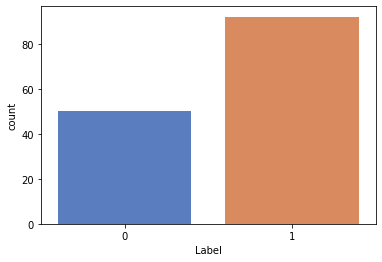

In [52]:
sns.countplot(x="Label", data=births_df, palette="muted");

In [71]:
# ensure both datasets have same length and years
df_lc = df_lc[24:-2]
births_df = births_df[:-8]
df_lc.reset_index()
births_df.reset_index()

Data Series,index,Total Live-Births By Birth Order,Label,1st Live-Birth,2nd Live-Birth,3rd Live-Birth,4th Live-Birth,5th Live-Birth,6th Live-Birth & Over,Quarter
0,1986 1Q,9954,0,4414,3553,1433,316,103,61,1986 1Q
1,1986 2Q,9353,0,4186,3367,1271,332,87,50,1986 2Q
2,1986 3Q,9854,1,4398,3475,1395,359,98,44,1986 3Q
3,1986 4Q,10239,1,4782,3423,1454,351,98,51,1986 4Q
4,1987 1Q,8834,0,4007,3053,1234,320,81,56,1987 1Q
...,...,...,...,...,...,...,...,...,...,...
129,2018 2Q,9427,0,4387,3338,1168,374,94,66,2018 2Q
130,2018 3Q,9841,1,4574,3532,1224,337,116,58,2018 3Q
131,2018 4Q,10173,1,4711,3670,1232,372,109,79,2018 4Q
132,2019 1Q,9402,0,4456,3316,1128,316,105,81,2019 1Q


In [72]:
target = pd.to_numeric(births_df.Label)
target.dtypes

dtype('int64')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_lc.drop("quarter", 1), 
                                                    target,
                                                    test_size=0.3,
                                                    random_state=0) 

X_train

/var/folders/n3/k22jjdlj0mjg38pn4qw5jc1c0000gn/T/ipykernel_14831/626486465.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_train, X_test, y_train, y_test = train_test_split(df_lc.drop("quarter", 1),


level_3,Unit Labour Cost Of Accommodation & Food Services,Unit Labour Cost Of Business Services,Unit Labour Cost Of Construction,Unit Labour Cost Of Finance & Insurance,Unit Labour Cost Of Information & Communications,Unit Labour Cost Of Manufacturing,Unit Labour Cost Of Other Goods Industries,Unit Labour Cost Of Other Services Industries,Unit Labour Cost Of Overall Economy,Unit Labour Cost Of Transportation & Storage,Unit Labour Cost Of Utilities,Unit Labour Cost Of Wholesale & Retail Trade
39,53.0,47.8,89.5,55.9,87.9,118.8,53.9,80.2,74.4,73.1,101.3,110.8
80,70.1,85.5,97.0,93.1,67.4,117.0,68.6,67.1,89.4,83.2,74.9,133.4
64,68.1,66.1,90.4,63.5,67.3,134.9,67.2,64.4,88.2,86.7,68.5,145.7
134,88.9,91.4,92.4,99.9,84.7,81.7,87.8,88.2,94.4,85.9,81.7,90.6
78,72.5,72.9,85.4,84.5,61.4,96.9,64.3,68.2,87.3,76.8,67.8,116.3
...,...,...,...,...,...,...,...,...,...,...,...,...
33,50.4,32.5,69.6,44.6,75.7,92.1,45.2,50.8,65.6,53.8,62.0,89.4
127,88.2,94.8,82.8,108.5,93.8,94.4,104.6,87.4,91.1,94.9,79.4,108.2
91,75.9,83.4,85.2,96.4,78.5,121.5,97.9,81.0,91.1,86.7,89.9,127.7
141,97.5,95.2,93.9,100.4,98.5,90.6,99.4,90.3,99.5,94.8,89.1,92.0


In [74]:
from sklearn.preprocessing import MinMaxScaler

# define a new scaler: 
x_scaler = MinMaxScaler()

# fit the normalization on the training set: 
x_scaler.fit(X_train)

# then create new and normalized training/test sets: 
X_train_norm = x_scaler.transform(X_train)
X_test_norm = x_scaler.transform(X_test)

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# def evaluate_on_training_set(y_test, y_pred):
#   print(classification_report(y_test, y_pred))
#   print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

def evaluate_on_training_set(y_test, y_pred):
  # Calculate AUC
  print("AUC is: ", roc_auc_score(y_test, y_pred))
  # print out recall and precision
  print(classification_report(y_test, y_pred))
  # print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

AUC is:  0.57375
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.65      0.96      0.77        25

    accuracy                           0.66        41
   macro avg       0.70      0.57      0.54        41
weighted avg       0.69      0.66      0.59        41

Confusion Matrix: 
 [[ 3 13]
 [ 1 24]]


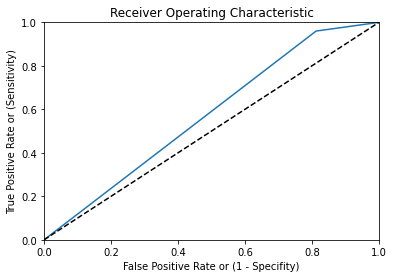

In [76]:
# SVM
from sklearn.svm import SVC
model = SVC(C=10, gamma='auto', kernel='rbf')
model.fit(X_train_norm, y_train) # Training SVM

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

AUC is:  0.57375
              precision    recall  f1-score   support

           0       0.75      0.19      0.30        16
           1       0.65      0.96      0.77        25

    accuracy                           0.66        41
   macro avg       0.70      0.57      0.54        41
weighted avg       0.69      0.66      0.59        41

Confusion Matrix: 
 [[ 3 13]
 [ 1 24]]


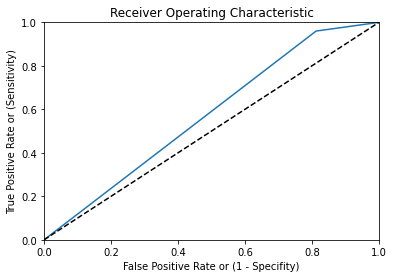

In [77]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=1.0, multi_class='auto', solver='lbfgs') 
model.fit(X_train_norm, y_train) # Training the model

y_pred = model.predict(X_test_norm) # Predicting labels for our test set using trained model
evaluate_on_training_set(y_test, y_pred) #evaluate our model using newly defined function

AUC is:  0.69
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        16
           1       0.73      0.88      0.80        25

    accuracy                           0.73        41
   macro avg       0.73      0.69      0.70        41
weighted avg       0.73      0.73      0.72        41

Confusion Matrix: 
 [[ 8  8]
 [ 3 22]]


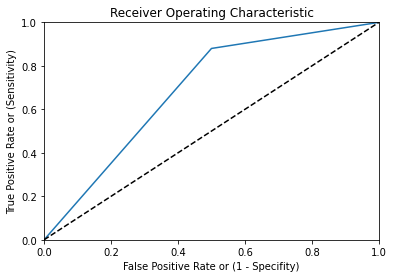

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100) # Define the model
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)
evaluate_on_training_set(y_test, y_pred)